In [2]:
import pandas as pd
import numpy as np
mylist2=pd.read_csv("forcastingprj.csv")
mylist2

,DD_PKTRNID,DD_EnquiryDate
0,4632,04-01-2018
1,4666,08-20-2017
2,18235,03-23-2018
3,5343,03-31-2018
4,5926,03-29-2018
...,...,...
538633,366578,02-02-2024
538634,366961,02-03-2024
538635,363059,02-01-2024
538636,536424,01-18-2024


In [3]:
mylist2['DD_EnquiryDate']=pd.to_datetime(mylist2['DD_EnquiryDate'])
mylist2['DD_EnquiryDateYM'] = mylist2['DD_EnquiryDate'].dt.strftime('%Y-%m')
mylist2['DD_EnquiryDateY'] = mylist2['DD_EnquiryDate'].dt.strftime('%Y')
mylist2.sort_values(by=['DD_EnquiryDateYM'])
mylist2=mylist2.sort_values(by=['DD_EnquiryDate'])
mylist2

,DD_PKTRNID,DD_EnquiryDate,DD_EnquiryDateYM,DD_EnquiryDateY
411382,482607,1996-02-10,1996-02,1996
63274,625,2013-12-03,2013-12,2013
154167,967,2014-02-18,2014-02,2014
18283,2552,2014-03-21,2014-03,2014
2003,478,2014-07-18,2014-07,2014
...,...,...,...,...
538635,363059,2024-02-01,2024-02,2024
538620,534875,2024-02-01,2024-02,2024
538623,536452,2024-02-02,2024-02,2024
538633,366578,2024-02-02,2024-02,2024


In [4]:
mylist2['count'] = mylist2['DD_EnquiryDateYM'].map(mylist2['DD_EnquiryDateYM'].value_counts())
mylist2.sort_values(by='DD_EnquiryDate')
mylist2=mylist2.sort_values(by='DD_EnquiryDateYM')
mylist2

,DD_PKTRNID,DD_EnquiryDate,DD_EnquiryDateYM,DD_EnquiryDateY,count
411382,482607,1996-02-10,1996-02,1996,1
63274,625,2013-12-03,2013-12,2013,1
154167,967,2014-02-18,2014-02,2014,1
18283,2552,2014-03-21,2014-03,2014,1
2003,478,2014-07-18,2014-07,2014,1
...,...,...,...,...,...
538613,363322,2024-02-01,2024-02,2024,9
538635,363059,2024-02-01,2024-02,2024,9
538620,534875,2024-02-01,2024-02,2024,9
538623,536452,2024-02-02,2024-02,2024,9


In [5]:
count=mylist2['DD_EnquiryDateYM'].value_counts().sort_values()
count

DD_EnquiryDateYM
1996-02        1
2014-08        1
2014-02        1
2014-03        1
2014-07        1
           ...  
2021-10    12293
2018-10    12722
2019-10    13073
2022-10    13279
2020-10    15924
Name: count, Length: 117, dtype: int64

In [6]:
import pandas as pd
import datetime
mylist2['DD_EnquiryDate'] = pd.to_datetime(mylist2['DD_EnquiryDate'])
mylist2['month'] = mylist2['DD_EnquiryDate'].dt.month
mylist2['year'] = mylist2['DD_EnquiryDate'].dt.year
pivot_table = pd.pivot_table(mylist2 ,values='count', index='month', columns='year', aggfunc='count', fill_value=0)
df3 = pivot_table.reset_index()
df3=df3.set_index('month')
df3

year,1996,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
month,,,,,,,,,,,,,
1,0,0,0,1,8,77,944,7736,7301,8820,7285,6844,4468
2,1,0,1,1,6,64,1246,7495,8158,10480,6877,7113,9
3,0,0,1,1,13,114,2358,7886,5851,10520,9104,9542,0
4,0,0,0,5,15,137,5541,5813,2244,5440,6443,6440,0
5,0,0,0,4,26,126,8473,6849,6956,6858,8666,8262,0
6,0,0,0,2,37,150,9714,7906,10806,10481,8431,9213,0
7,0,0,1,0,31,172,5274,4877,5162,5812,4712,5738,0
8,0,0,1,3,39,277,6771,5204,6816,5635,5513,5332,0
9,0,0,1,6,34,379,7702,9079,11533,7794,10987,7281,0


In [7]:
# Sorted Data
df4=df3.drop(axis=0,columns=[1996, 2013, 2014,2015,2016,2017, 2024])
df4
df4['Month_average'] = df4.mean(axis=1)
df4.loc['Year_avg'] = df4.mean(axis=0)
df4=df4.round()
df4

year,2018,2019,2020,2021,2022,2023,Month_average
month,,,,,,,
1,944.0,7736.0,7301.0,8820.0,7285.0,6844.0,6488.0
2,1246.0,7495.0,8158.0,10480.0,6877.0,7113.0,6895.0
3,2358.0,7886.0,5851.0,10520.0,9104.0,9542.0,7544.0
4,5541.0,5813.0,2244.0,5440.0,6443.0,6440.0,5320.0
5,8473.0,6849.0,6956.0,6858.0,8666.0,8262.0,7677.0
6,9714.0,7906.0,10806.0,10481.0,8431.0,9213.0,9425.0
7,5274.0,4877.0,5162.0,5812.0,4712.0,5738.0,5262.0
8,6771.0,5204.0,6816.0,5635.0,5513.0,5332.0,5878.0
9,7702.0,9079.0,11533.0,7794.0,10987.0,7281.0,9063.0


In [8]:
#seasonality
data=[]
for i in df4['Month_average']:
    div=i/df4.loc['Year_avg']
    data.append(div)
data
df5=pd.DataFrame(data)
df5=df5.drop(columns=['Month_average'])
df5.reset_index()
df5
df7=pd.merge(df4,df5,on=df4.index)
df7

year,key_0,2018_x,2019_x,2020_x,2021_x,2022_x,2023_x,Month_average,2018_y,2019_y,2020_y,2021_y,2022_y,2023_y
0,1,944.0,7736.0,7301.0,8820.0,7285.0,6844.0,6488.0,1.068511,0.894526,0.828291,0.807769,0.836622,0.887551
1,2,1246.0,7495.0,8158.0,10480.0,6877.0,7113.0,6895.0,1.135540,0.950641,0.880250,0.858441,0.889104,0.943228
2,3,2358.0,7886.0,5851.0,10520.0,9104.0,9542.0,7544.0,1.242424,1.040121,0.963105,0.939243,0.972792,1.032011
3,4,5541.0,5813.0,2244.0,5440.0,6443.0,6440.0,5320.0,0.876153,0.733490,0.679178,0.662351,0.686009,0.727770
4,5,8473.0,6849.0,6956.0,6858.0,8666.0,8262.0,7677.0,1.264328,1.058459,0.980084,0.955802,0.989942,1.050205
5,6,9714.0,7906.0,10806.0,10481.0,8431.0,9213.0,9425.0,1.552207,1.299462,1.203243,1.173431,1.215345,1.289330
6,7,5274.0,4877.0,5162.0,5812.0,4712.0,5738.0,5262.0,0.866601,0.725493,0.671773,0.655129,0.678530,0.719836
7,8,6771.0,5204.0,6816.0,5635.0,5513.0,5332.0,5878.0,0.968050,0.810423,0.750415,0.731823,0.757963,0.804104
8,9,7702.0,9079.0,11533.0,7794.0,10987.0,7281.0,9063.0,1.492589,1.249552,1.157028,1.128362,1.168665,1.239808
9,10,12722.0,13073.0,15924.0,12293.0,13279.0,10822.0,13019.0,2.144104,1.794981,1.662071,1.620891,1.678788,1.780985


In [9]:
mylist2

,DD_PKTRNID,DD_EnquiryDate,DD_EnquiryDateYM,DD_EnquiryDateY,count,month,year
411382,482607,1996-02-10,1996-02,1996,1,2,1996
63274,625,2013-12-03,2013-12,2013,1,12,2013
154167,967,2014-02-18,2014-02,2014,1,2,2014
18283,2552,2014-03-21,2014-03,2014,1,3,2014
2003,478,2014-07-18,2014-07,2014,1,7,2014
...,...,...,...,...,...,...,...
538613,363322,2024-02-01,2024-02,2024,9,2,2024
538635,363059,2024-02-01,2024-02,2024,9,2,2024
538620,534875,2024-02-01,2024-02,2024,9,2,2024
538623,536452,2024-02-02,2024-02,2024,9,2,2024


In [10]:
mylist3=pd.DataFrame({'Date':mylist2['DD_EnquiryDateYM'],
                      'Sales': mylist2['count']})
mylist3.set_index('Date')
start_date = '2017-12-31'
end_date = '2023-12-31'
filtered_df = mylist3.loc[(mylist3['Date'] >= start_date) & (mylist3['Date'] <= end_date)]
filtered_df2=filtered_df.value_counts()
filtered_df2= filtered_df2.sort_index()
filtered_df2

Date     Sales
2018-01  944        944
2018-02  1246      1246
2018-03  2358      2358
2018-04  5541      5541
2018-05  8473      8473
                  ...  
2023-08  5332      5332
2023-09  7281      7281
2023-10  10822    10822
2023-11  7747      7747
2023-12  3391      3391
Name: count, Length: 72, dtype: int64

In [25]:
train= df5[df5.Date <= '2018']
test= df5[df5.Date > '2018']
test.shape

(72, 2)

In [26]:
train.shape

(0, 2)

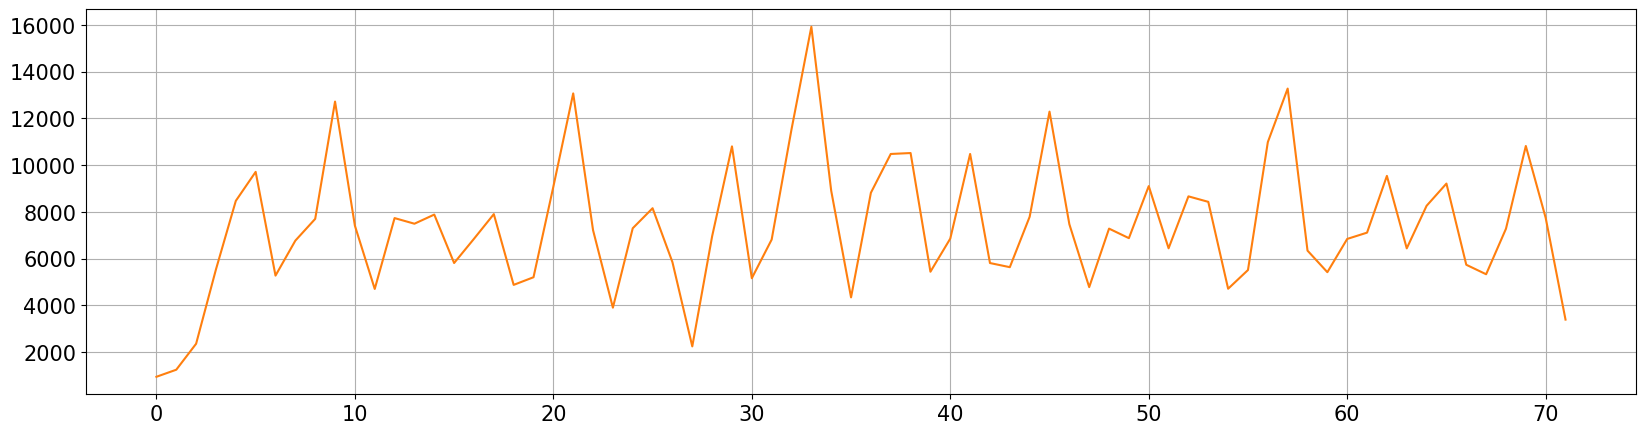

In [27]:
train['Sales'].plot(figsize=(20,5),fontsize=15)
test['Sales'].plot(figsize=(20,5),fontsize=15)
plt.grid()

In [17]:
df5=pd.DataFrame(filtered_df2)  
df5=df5.drop(columns=['count'])
df5=df5.reset_index()
df5.set_index('Date')

,Sales
Date,
2018-01,944
2018-02,1246
2018-03,2358
2018-04,5541
2018-05,8473
...,...
2023-08,5332
2023-09,7281
2023-10,10822


<Axes: >

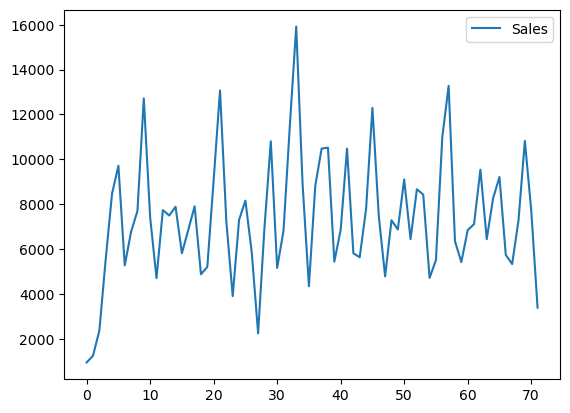

In [18]:
df5.plot()

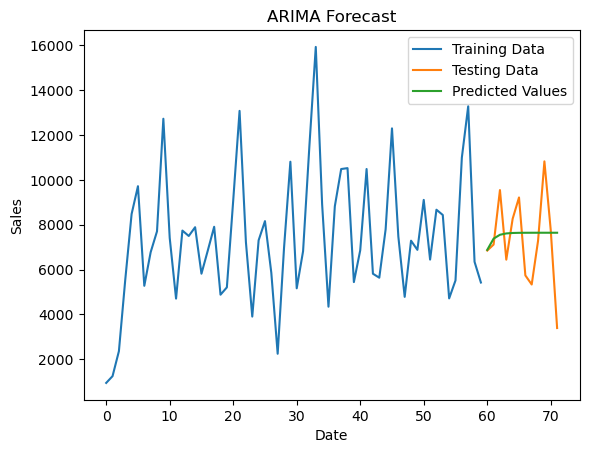

In [19]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
train_size = int(len(df5['Date'])*0.84)
train_data, test_data = df5[:train_size], df5[train_size:]
order = (1,1,1)  
model = ARIMA(train_data['Sales'], order=order)
model_fit = model.fit()
predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])
plt.plot(train_data.index, train_data['Sales'], label='Training Data')
plt.plot(test_data.index, test_data['Sales'], label='Testing Data')
plt.plot(predictions.index, predictions, label='Predicted Values')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('ARIMA Forecast')
plt.show()

In [20]:
predicted_value = predictions
predicted_value.round(2)

60    6876.21
61    7377.08
62    7549.35
63    7608.61
64    7628.99
65    7636.00
66    7638.41
67    7639.24
68    7639.52
69    7639.62
70    7639.65
71    7639.67
Name: predicted_mean, dtype: float64

In [21]:
df6=pd.DataFrame({'year' : range(2018,2025),
                 'sales':df4.loc['Year_avg'] })
df6=df6.drop(index=['Month_average'],columns='year')
df6

,sales
year,
2018,6072.0
2019,7253.0
2020,7833.0
2021,8032.0
2022,7755.0
2023,7310.0


<Axes: xlabel='year'>

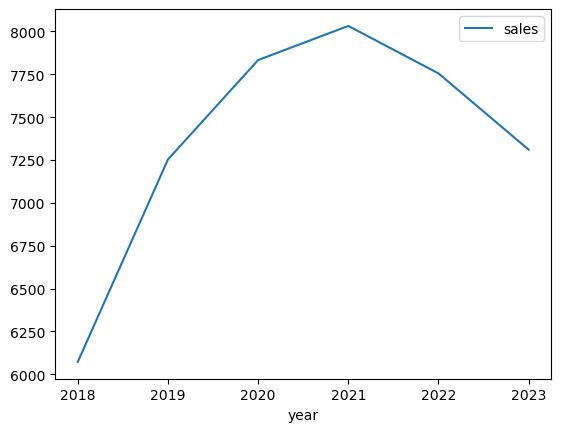

In [22]:
df6.plot()

In [23]:
mylist4=pd.DataFrame({'predicted_value': predicted_value.round(2)})
mylist4=mylist4.reset_index().drop(columns=['index'])
mylist4

,predicted_value
0,6876.21
1,7377.08
2,7549.35
3,7608.61
4,7628.99
5,7636.00
6,7638.41
7,7639.24
8,7639.52
9,7639.62


In [24]:
df7['prediction_value']=mylist4['predicted_value']
df7

year,key_0,2018_x,2019_x,2020_x,2021_x,2022_x,2023_x,Month_average,2018_y,2019_y,2020_y,2021_y,2022_y,2023_y,prediction_value
0,1,944.0,7736.0,7301.0,8820.0,7285.0,6844.0,6488.0,1.068511,0.894526,0.828291,0.807769,0.836622,0.887551,6876.21
1,2,1246.0,7495.0,8158.0,10480.0,6877.0,7113.0,6895.0,1.135540,0.950641,0.880250,0.858441,0.889104,0.943228,7377.08
2,3,2358.0,7886.0,5851.0,10520.0,9104.0,9542.0,7544.0,1.242424,1.040121,0.963105,0.939243,0.972792,1.032011,7549.35
3,4,5541.0,5813.0,2244.0,5440.0,6443.0,6440.0,5320.0,0.876153,0.733490,0.679178,0.662351,0.686009,0.727770,7608.61
4,5,8473.0,6849.0,6956.0,6858.0,8666.0,8262.0,7677.0,1.264328,1.058459,0.980084,0.955802,0.989942,1.050205,7628.99
5,6,9714.0,7906.0,10806.0,10481.0,8431.0,9213.0,9425.0,1.552207,1.299462,1.203243,1.173431,1.215345,1.289330,7636.00
6,7,5274.0,4877.0,5162.0,5812.0,4712.0,5738.0,5262.0,0.866601,0.725493,0.671773,0.655129,0.678530,0.719836,7638.41
7,8,6771.0,5204.0,6816.0,5635.0,5513.0,5332.0,5878.0,0.968050,0.810423,0.750415,0.731823,0.757963,0.804104,7639.24
8,9,7702.0,9079.0,11533.0,7794.0,10987.0,7281.0,9063.0,1.492589,1.249552,1.157028,1.128362,1.168665,1.239808,7639.52
9,10,12722.0,13073.0,15924.0,12293.0,13279.0,10822.0,13019.0,2.144104,1.794981,1.662071,1.620891,1.678788,1.780985,7639.62
